# Graphs for EDA of Datasets
Note, these graphs are distributed throughout the notebooks, but it is convinient to have them here in one place to make modifications, and (most importantly) not alter the original datasets

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## EV Sessions
* Load dataset
* Boxplot, arrivals per month
* Histogram, laxity 
* Occupancy hist?


In [4]:
df_eld = pd.read_csv('../data/df_elaad_preproc.csv', parse_dates = ["starttime_parking", "endtime_parking"])
df_eld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9997 entries, 0 to 9996
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   session               9997 non-null   int64         
 1   ChargePoint           9997 non-null   object        
 2   Connector             9997 non-null   int64         
 3   starttime_parking     9997 non-null   datetime64[ns]
 4   endtime_parking       9997 non-null   datetime64[ns]
 5   StartCard             9997 non-null   object        
 6   connected_time_float  9997 non-null   float64       
 7   charged_time_float    9997 non-null   float64       
 8   total_energy          9997 non-null   float64       
 9   max_power             9997 non-null   float64       
 10  start_hour            9997 non-null   int64         
 11  day_no                9997 non-null   int64         
 12  energy_supplied       9997 non-null   float64       
 13  soc_arr           

In [7]:
# Make count sessions day by month dataframe
df_eld["day"] = df_eld["starttime_parking"].dt.day
df_eld["month"] = df_eld["starttime_parking"].dt.month
count_eld = df_eld.groupby(["day", "month"]).agg(count = ("starttime_parking", "count")).reset_index()

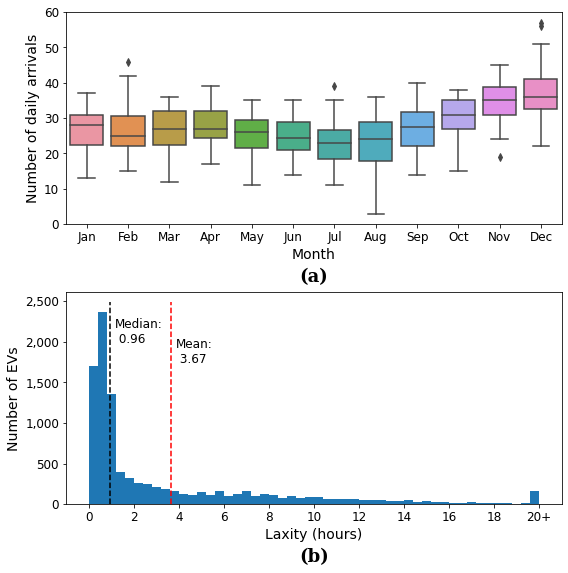

In [97]:
fig1, (ax1, ax2) = plt.subplots(2, 1, figsize = (8, 8))
fontsize = 14

# Ax1 
sns.boxplot(x="month", y="count", data=count_eld, ax=ax1)
l_month = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
ax1.set_ylim([0, 60])
x_ticks = ax1.get_xticks()
ax1.set_xticks(x_ticks)
ax1.set_xticklabels(l_month, fontsize = fontsize - 2)
ax1.set_xlabel("Month", fontsize = fontsize)

y_ticks = ax1.get_yticks()
ax1.set_yticks(y_ticks)
ax1.set_yticklabels([f"{y:.0f}" for y in y_ticks], fontsize = fontsize - 2)

ax1.set_ylabel("Number of daily arrivals", fontsize = fontsize)

# Ax2
#ax2.set_xscale('log')
#ax2.set_yscale('log')
df_eld["laxity_proc"] = df_eld["laxity"].apply(lambda x: min(x, 20))
ax2.hist(df_eld["laxity_proc"], bins = 50)
lax_mean = df_eld["laxity"].mean()
lax_p25, lax_p50, lax_p75 = np.percentile(df_eld["laxity"], (25, 50, 75))

y_lims =  ax2.get_ylim()
y_ticks = ax2.get_yticks()
ax2.set_yticks(y_ticks)
ax2.set_yticklabels([f"{y:,.0f}" for y in y_ticks], fontsize = fontsize - 2)

ax2.vlines(lax_mean, y_lims[0], y_lims[1], color = "red", linestyle = "--")#, label = "Mean")
ax2.text(lax_mean + 0.2, y_lims[1] * 0.7, f"Mean:\n {lax_mean:.2f}", fontsize = fontsize - 2) 

ax2.vlines(lax_p50, y_lims[0], y_lims[1], color = "k", linestyle = "--")#, label = "Median")
ax2.text(lax_p50 + 0.2, y_lims[1] * 0.8, f"Median:\n {lax_p50:.2f}", fontsize = fontsize - 2) 

#ax2.vlines(lax_p25, y_lims[0], y_lims[1], color = "black", linestyle = "--")#, label = "Median")
#ax2.text(lax_p25 + 0.2, y_lims[1] * 0.7, f"p25: {lax_p25:.2f}", fontsize = fontsize - 2) 
#
#ax2.vlines(lax_p75, y_lims[0], y_lims[1], color = "black", linestyle = "--")#, label = "Median")
#ax2.text(lax_p75 + 0.2, y_lims[1] * 0.8, f"p25: {lax_p75:.2f}", fontsize = fontsize - 2) 

x_ticks = np.arange(0, 21, 2)
x_ticklabels = [f"{x:.0f}" for x in x_ticks]
x_ticklabels[-1] = f"{np.max(x_ticks)}+"
ax2.set_xticks(x_ticks)
ax2.set_xticklabels(x_ticklabels, fontsize = fontsize - 2)

ax2.set_xlabel("Laxity (hours)", fontsize = fontsize)
ax2.set_ylabel("Number of EVs", fontsize = fontsize)

ax1.set_title(f"(a)", family = "serif", fontweight = "bold", fontsize = fontsize + 4, y = -0.3)
ax2.set_title(f"(b)", family = "serif", fontweight = "bold", fontsize = fontsize + 4, y = -0.3)

fig1.tight_layout()
#fig1.savefig("/home/javier/Documents/Escuela/SCRG/Refs/Contracts/Figs/fig_revVPP.pdf", dpi = 1200, bbox_inches='tight')
fig1.savefig("/home/javier/Documents/Escuela/SCRG/notes-scrg/writeups/Thesis-MsC/647584cd16a82b116e63ba95/img/eld_eda.pdf", dpi = 1200, bbox_inches='tight')


## IMB prices
* Load dataset
* Histogram of prices
    * Vlines for avg, std, etc
* Boxplot of various times

In [98]:
df_price = pd.read_csv("../data/df_prices_c.csv", parse_dates = ["date"])
df_price["hour"] = df_price["date"].dt.hour
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      52584 non-null  datetime64[ns]
 1   price_da  52584 non-null  int64         
 2   price_im  52584 non-null  float64       
 3   ts        52584 non-null  float64       
 4   hour      52584 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1)
memory usage: 1.8 MB


<Axes: xlabel='hour', ylabel='price_im'>

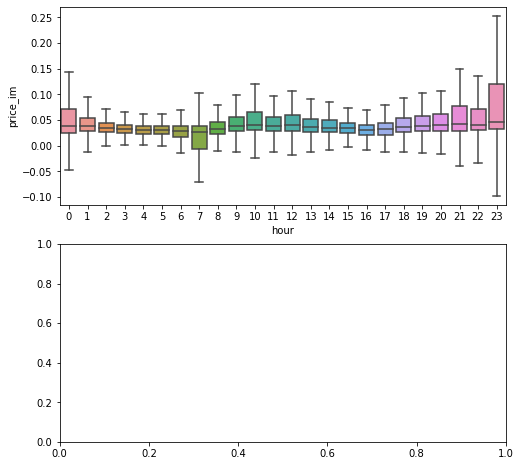

In [99]:
fig1, (ax1, ax2) = plt.subplots(2, 1, figsize = (8, 8))
fontsize = 14

sns.boxplot(x="hour", y="price_im", data=df_price, ax=ax1, showfliers=False)
#sns.move_legend(ax4, "lower center", ncol = 12)